In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_yearly, add_changepoints_to_plot

In [4]:
class CFG:
    data_path = "../data"
    img_dim1 = 20
    img_dim2 = 10
    nepochs = 6
    seed = 42
    EPOCH = 300
    bsize = 16
    BATCH_SIZE = 1024

# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})

In [6]:
spy_ohlc_df = pd.read_csv(CFG.data_path + '/' + 'spy_ohlc_df.csv')
dow_jones_ohlc_df = pd.read_csv(CFG.data_path + '/' + 'dow_jones_ohlc_df.csv')
nasdaq_ohlc_df = pd.read_csv(CFG.data_path + '/' + 'nasdaq_ohlc_df.csv')

In [11]:
nasdaq_ohlc_df = nasdaq_ohlc_df[:7050]

In [12]:
xdat = nasdaq_ohlc_df[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})
xdat

,ds,y
0,1995-01-03,398.000000
1,1995-01-04,399.649994
2,1995-01-05,398.019989
3,1995-01-06,401.589996
4,1995-01-09,403.529999
...,...,...
7045,2022-12-23,10985.450195
7046,2022-12-27,10822.509766
7047,2022-12-28,10679.339844
7048,2022-12-29,10951.049805


19:43:19 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing


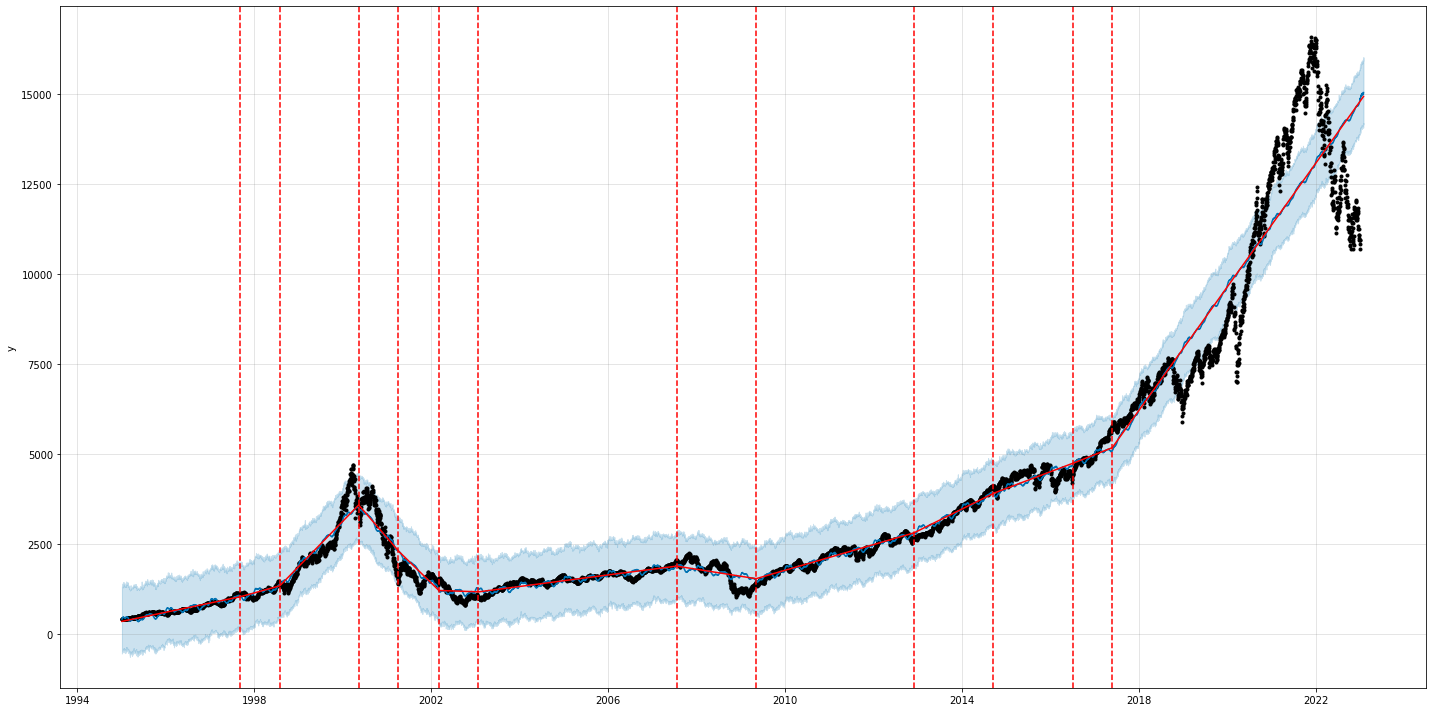

In [13]:
m = Prophet()

m.fit(xdat)
future = m.make_future_dataframe(periods= 30)
forecast = m.predict(future)
fig = m.plot(forecast, figsize=(CFG.img_dim1, CFG.img_dim2), xlabel = '')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [16]:
xdat2 = nasdaq_ohlc_df[['Date', 'Close']][-250:].rename(columns={"Date": "ds", "Close": "y"})

21:01:11 - cmdstanpy - INFO - Chain [1] start processing
21:01:11 - cmdstanpy - INFO - Chain [1] done processing


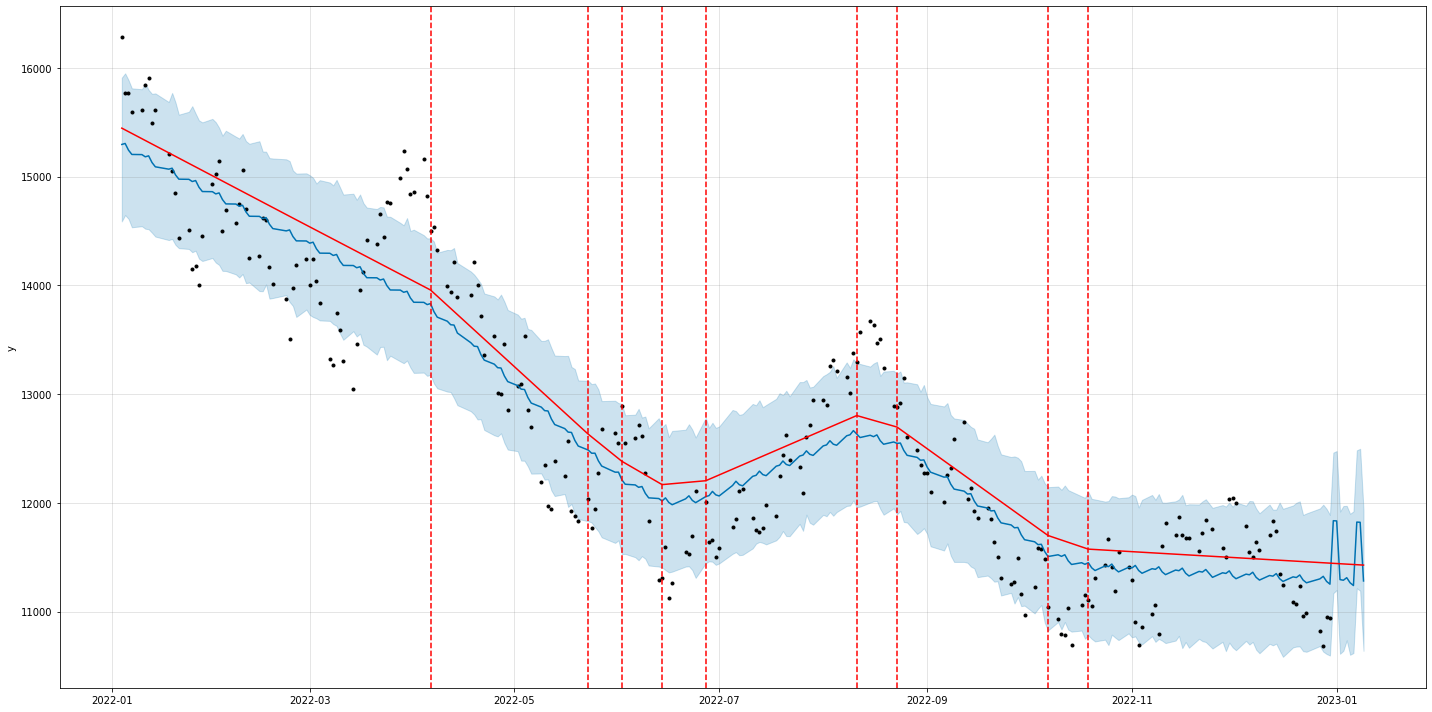

In [27]:
m2 = Prophet()

m2.fit(xdat2)
future2 = m2.make_future_dataframe(periods=10, freq='D')
forecast2 = m2.predict(future2)
fig2 = m2.plot(forecast2, figsize=(CFG.img_dim1, CFG.img_dim2), xlabel = '')
a2 = add_changepoints_to_plot(fig2.gca(), m2, forecast2)

In [28]:
df_cv_m2 = cross_validation(m2, initial = '250 days', period = '30 days', horizon='5 days')

  0%|          | 0/4 [00:00<?, ?it/s]

21:01:12 - cmdstanpy - INFO - Chain [1] start processing
21:01:12 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing
21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing
21:01:13 - cmdstanpy - INFO - Chain [1] done processing
21:01:13 - cmdstanpy - INFO - Chain [1] start processing
21:01:13 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
df_cv_m2.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-09-27,12125.444488,11445.320608,12790.254090,11271.750000,2022-09-26
1,2022-09-28,12156.887672,11504.120052,12847.407986,11493.830078,2022-09-26
2,2022-09-29,12097.949032,11405.807761,12769.907610,11164.780273,2022-09-26
3,2022-09-30,12047.613577,11371.142979,12774.233385,10971.219727,2022-09-26
4,2022-10-27,10797.636009,10193.820663,11366.595538,11191.629883,2022-10-26
5,2022-10-28,10721.032786,10167.444376,11332.670398,11546.209961,2022-10-26
6,2022-10-31,10684.016515,10105.694483,11279.446776,11405.570312,2022-10-26
7,2022-11-28,10940.021515,10188.787757,11628.302899,11587.750000,2022-11-25
8,2022-11-29,10935.154907,10208.470831,11652.577238,11503.450195,2022-11-25
9,2022-11-30,10940.553615,10257.903251,11653.813543,12030.059570,2022-11-25


In [30]:
df_cv_m2_p = performance_metrics(df_cv_m2)
df_cv_m2_p.head(5)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,442012.725986,664.840376,623.844181,0.055471,0.055471,0.054405,0.500000
1,2 days,507671.285719,712.510551,707.541706,0.062591,0.058618,0.062378,0.000000
2,3 days,647324.522616,804.564803,796.041831,0.071689,0.075588,0.070190,0.333333
3,4 days,572662.690371,756.744799,710.301307,0.063971,0.049402,0.062537,0.666667
4,5 days,644272.721535,802.666009,761.854939,0.065734,0.063263,0.067548,0.333333
